In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data collection & processing


In [9]:
# loading the data from sklearn

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [10]:
print (breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [11]:
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df['label'] = breast_cancer_dataset.target

In [14]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [15]:
df.shape

(569, 31)

In [16]:
# checking the missing null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [18]:
# chekcing the ration of 1 and 0 checking the imbalance

df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

In [19]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [20]:
x = df.drop(columns = 'label', axis=1)
y = df['label']

In [21]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [22]:
# y is having the target data which is requred
## we have split the data for the testing the data

print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


In [25]:
# Building the neural Network


# Building the neural Network



In [26]:
# importing tensorflow and Keras library

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [27]:
# setting up the layer of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2 , activation = 'sigmoid')
])

In [28]:
# compilling the neural network

model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
# traning the nural network

history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 23ms/step - loss: 37.0504 - accuracy: 0.4303 - val_loss: 1.1902 - val_accuracy: 0.8696
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 3.7748 - accuracy: 0.8337 - val_loss: 3.1864 - val_accuracy: 0.8696
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 2.3217 - accuracy: 0.8826 - val_loss: 0.4071 - val_accuracy: 0.8696
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 1.7358 - accuracy: 0.8557 - val_loss: 0.1190 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 1.2109 - accuracy: 0.9046 - val_loss: 0.1455 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0373 - accuracy: 0.9071 - val_loss: 0.0364 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 1.0110 - accuracy: 0.9144 - val_loss: 0.0656 - val_accuracy: 0.9783
Epoch 8/10
13/13 [

standerized the data


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)

x_test_std = scaler.fit_transform(x_test)

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2 , activation = 'sigmoid')
])

In [33]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [34]:
history = model.fit(x_train_std, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 18ms/step - loss: 0.4433 - accuracy: 0.8117 - val_loss: 0.3954 - val_accuracy: 0.8261
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3324 - accuracy: 0.8509 - val_loss: 0.2918 - val_accuracy: 0.8478
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2639 - accuracy: 0.8802 - val_loss: 0.2310 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2195 - accuracy: 0.9095 - val_loss: 0.1929 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1891 - accuracy: 0.9218 - val_loss: 0.1684 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1680 - accuracy: 0.9291 - val_loss: 0.1512 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1509 - accuracy: 0.9291 - val_loss: 0.1380 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

Visualising accuracy and loss

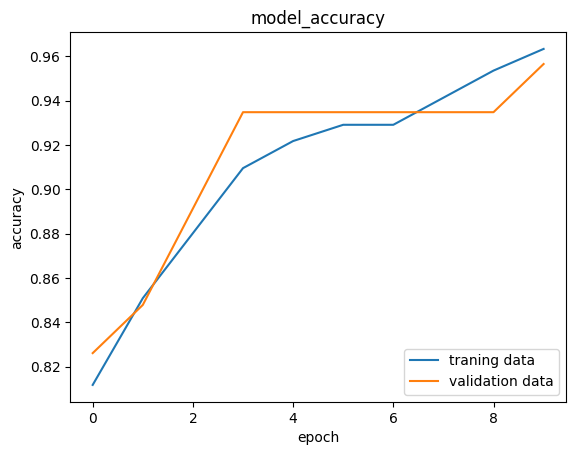

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['traning data', 'validation data'], loc = 'lower right')

In [40]:
loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.1527 - accuracy: 0.9474
0.9473684430122375


In [41]:
print(x_test_std.shape)
print(x_test_std[0])


(114, 30)
[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [42]:
y_predict = model.predict(x_test_std)

4/4 [==============================] - 0s 4ms/step


In [43]:
print(y_predict.shape)
print(y_predict[0])

(114, 2)
[0.18856403 0.60892224]


In [45]:
my_list = [0.50, 0.20]

index_my_list = np.argmax(my_list)

print(my_list)
print(index_my_list)

[0.5, 0.2]
0
